Name: Dohyun Kim 

Student number: 1007372843

In [35]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy import stats

# Part 1

In [28]:
data = pd.read_csv('apple_quality.csv')
data = data.dropna()
y = data[["Sweetness"]]
X = data[["Size", "Weight", "Crunchiness", "Juiciness"]]
p = 4

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=2.5, sigma=5, lower=0)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 52 seconds.


Split-Rhats {'betas': array([[1.0005, 1.0021, 1.0007, 0.9999],
       [1.0006, 1.0008, 1.0009, 1.0014],
       [1.0007, 0.9996, 1.0011, 1.0017],
       [1.0017, 1.0006, 1.0015, 1.0014]]), 'sigma': 0.9998} | 

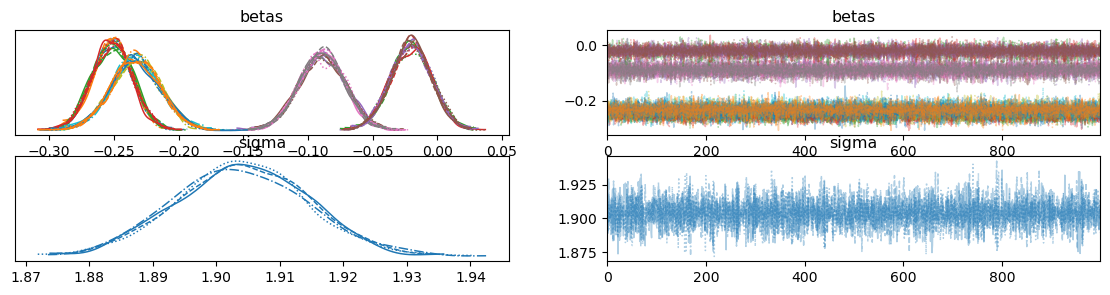

In [33]:
fig,ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(idata, axes=ax[:2,:2])
print("Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata).items()}, end=' | ')

In [34]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.25,0.02,-0.28,-0.22,0.0,0.0,8511.98,2933.48,1.0
"betas[0, 1]",-0.25,0.02,-0.28,-0.22,0.0,0.0,7608.15,2662.07,1.0
"betas[0, 2]",-0.25,0.02,-0.28,-0.22,0.0,0.0,8685.64,3016.48,1.0
"betas[0, 3]",-0.25,0.02,-0.28,-0.22,0.0,0.0,8541.36,2886.01,1.0
"betas[1, 0]",-0.09,0.02,-0.12,-0.05,0.0,0.0,6836.53,3184.62,1.0
"betas[1, 1]",-0.09,0.02,-0.12,-0.05,0.0,0.0,6871.95,3001.91,1.0
"betas[1, 2]",-0.09,0.02,-0.12,-0.06,0.0,0.0,6600.25,3714.42,1.0
"betas[1, 3]",-0.09,0.02,-0.12,-0.06,0.0,0.0,6590.82,3583.09,1.0
"betas[2, 0]",-0.23,0.02,-0.27,-0.20,0.0,0.0,6179.40,3505.80,1.0
"betas[2, 1]",-0.23,0.02,-0.27,-0.19,0.0,0.0,7339.79,3297.29,1.0


# Part 2

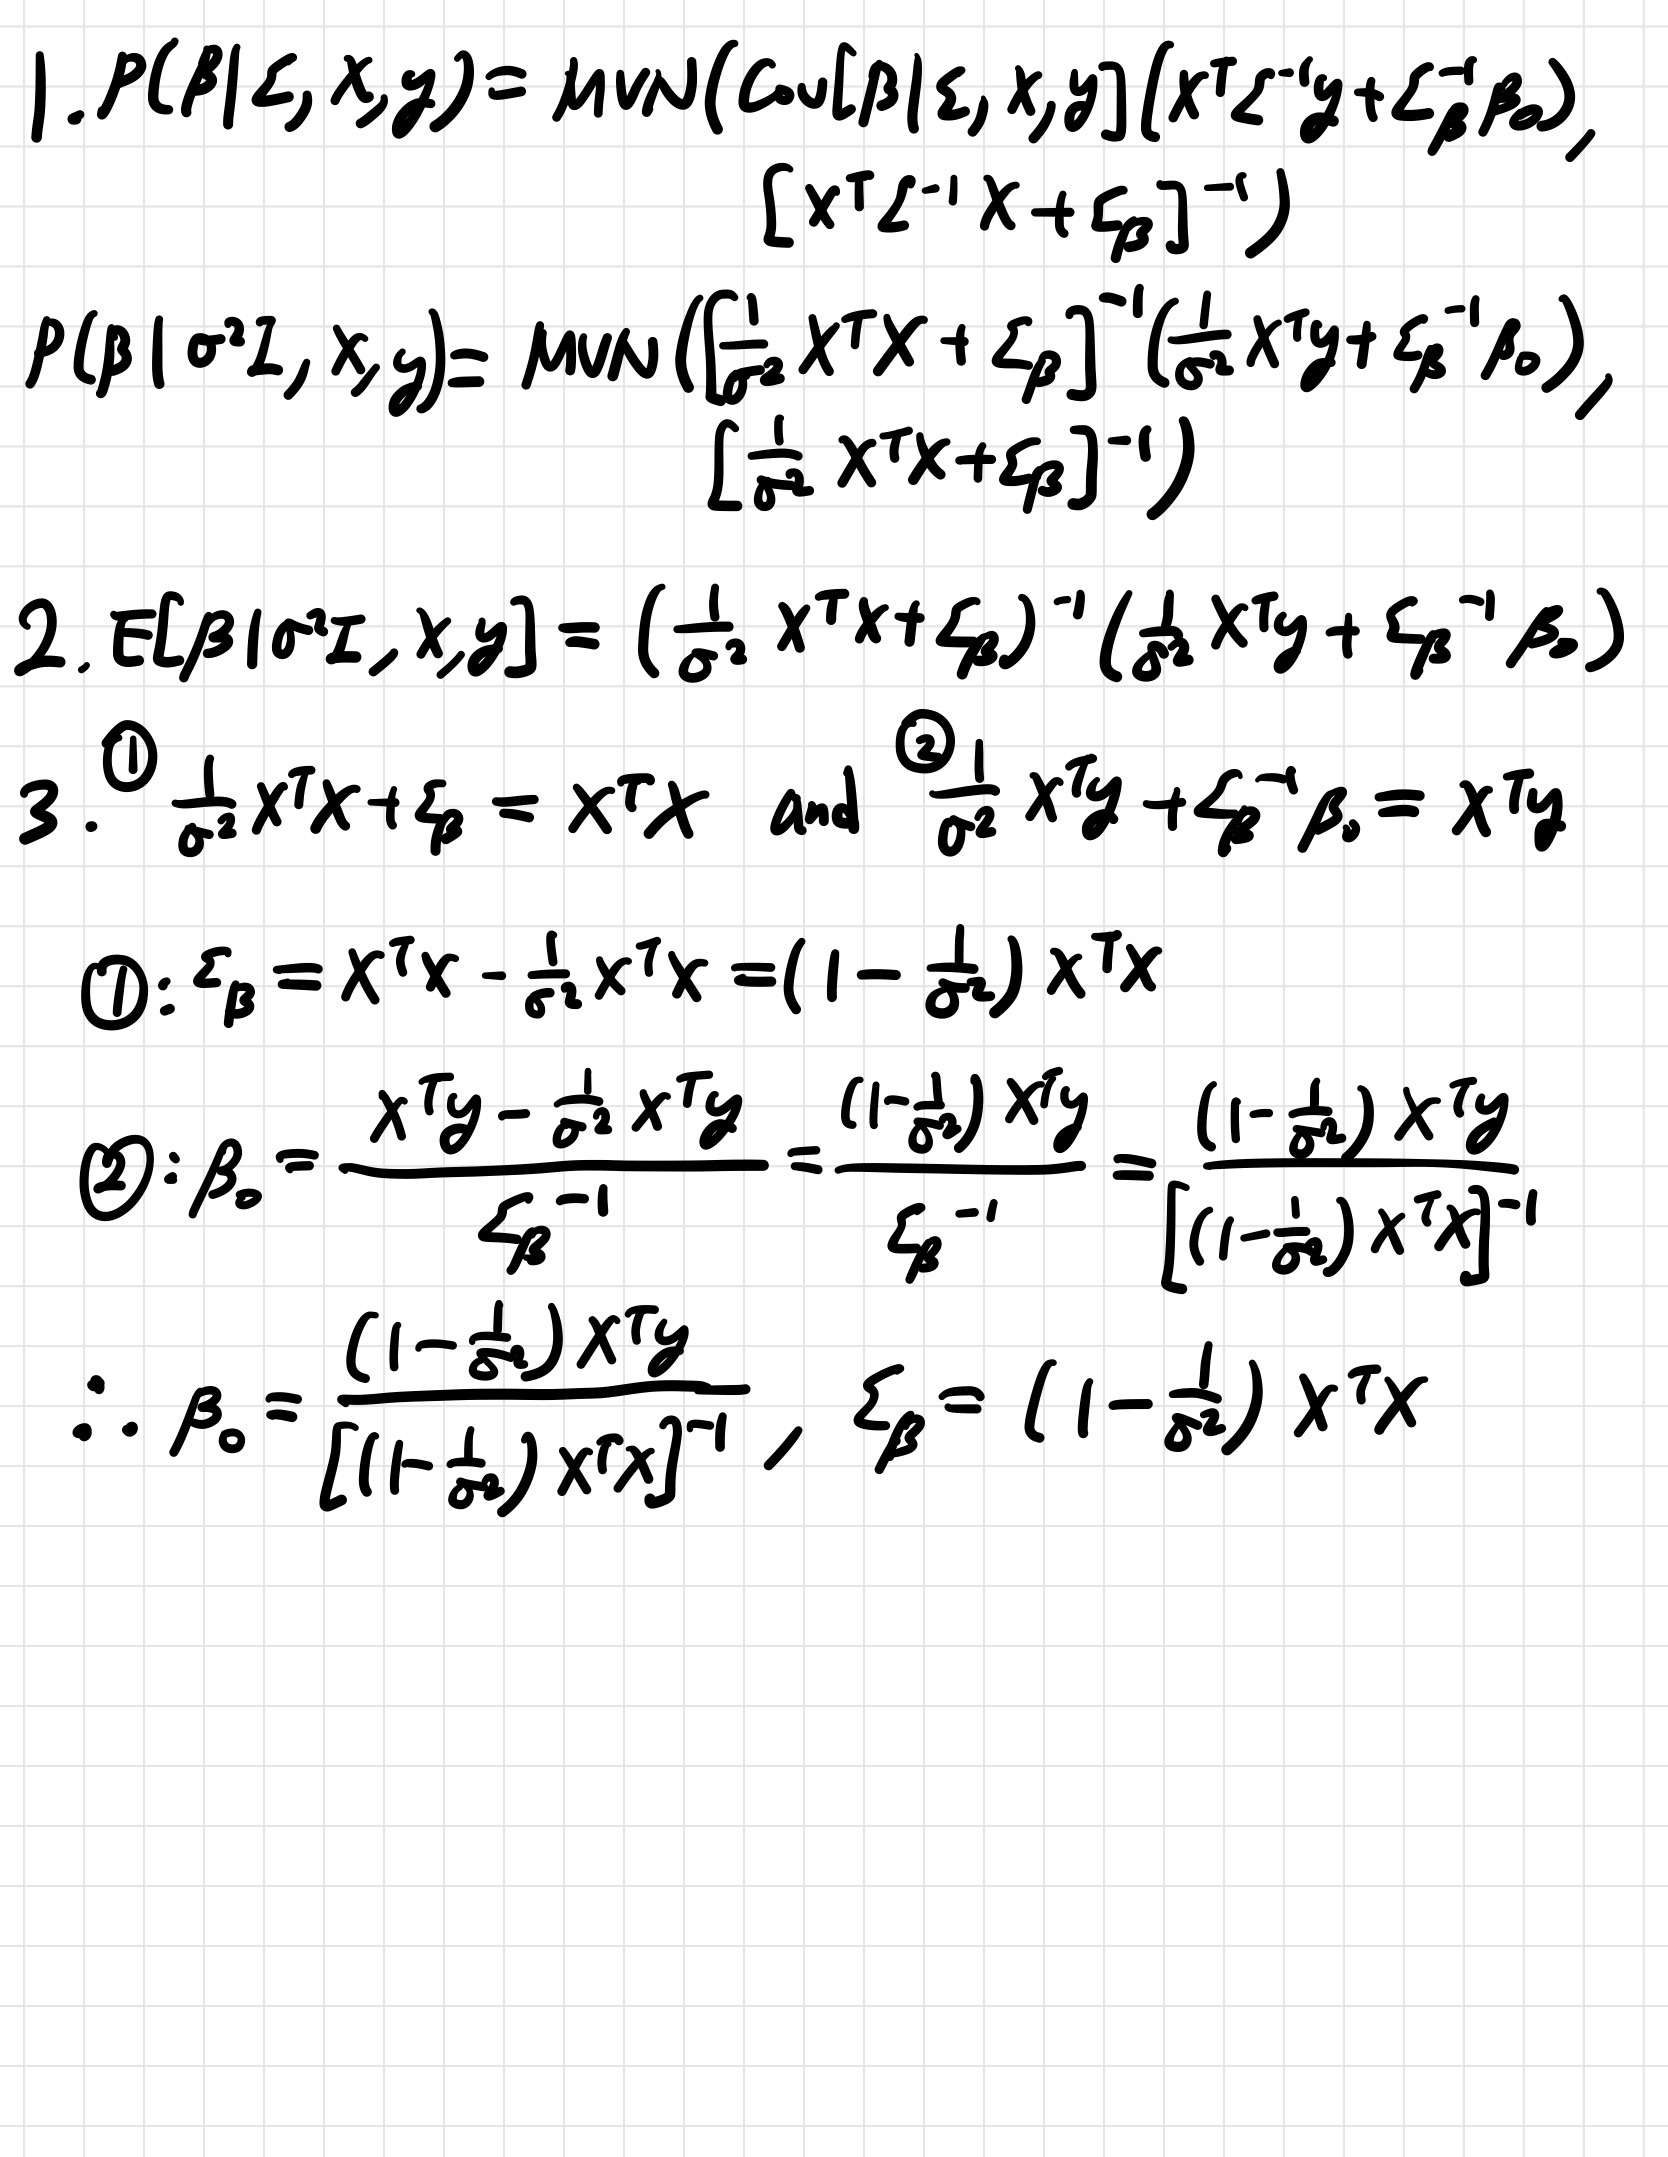

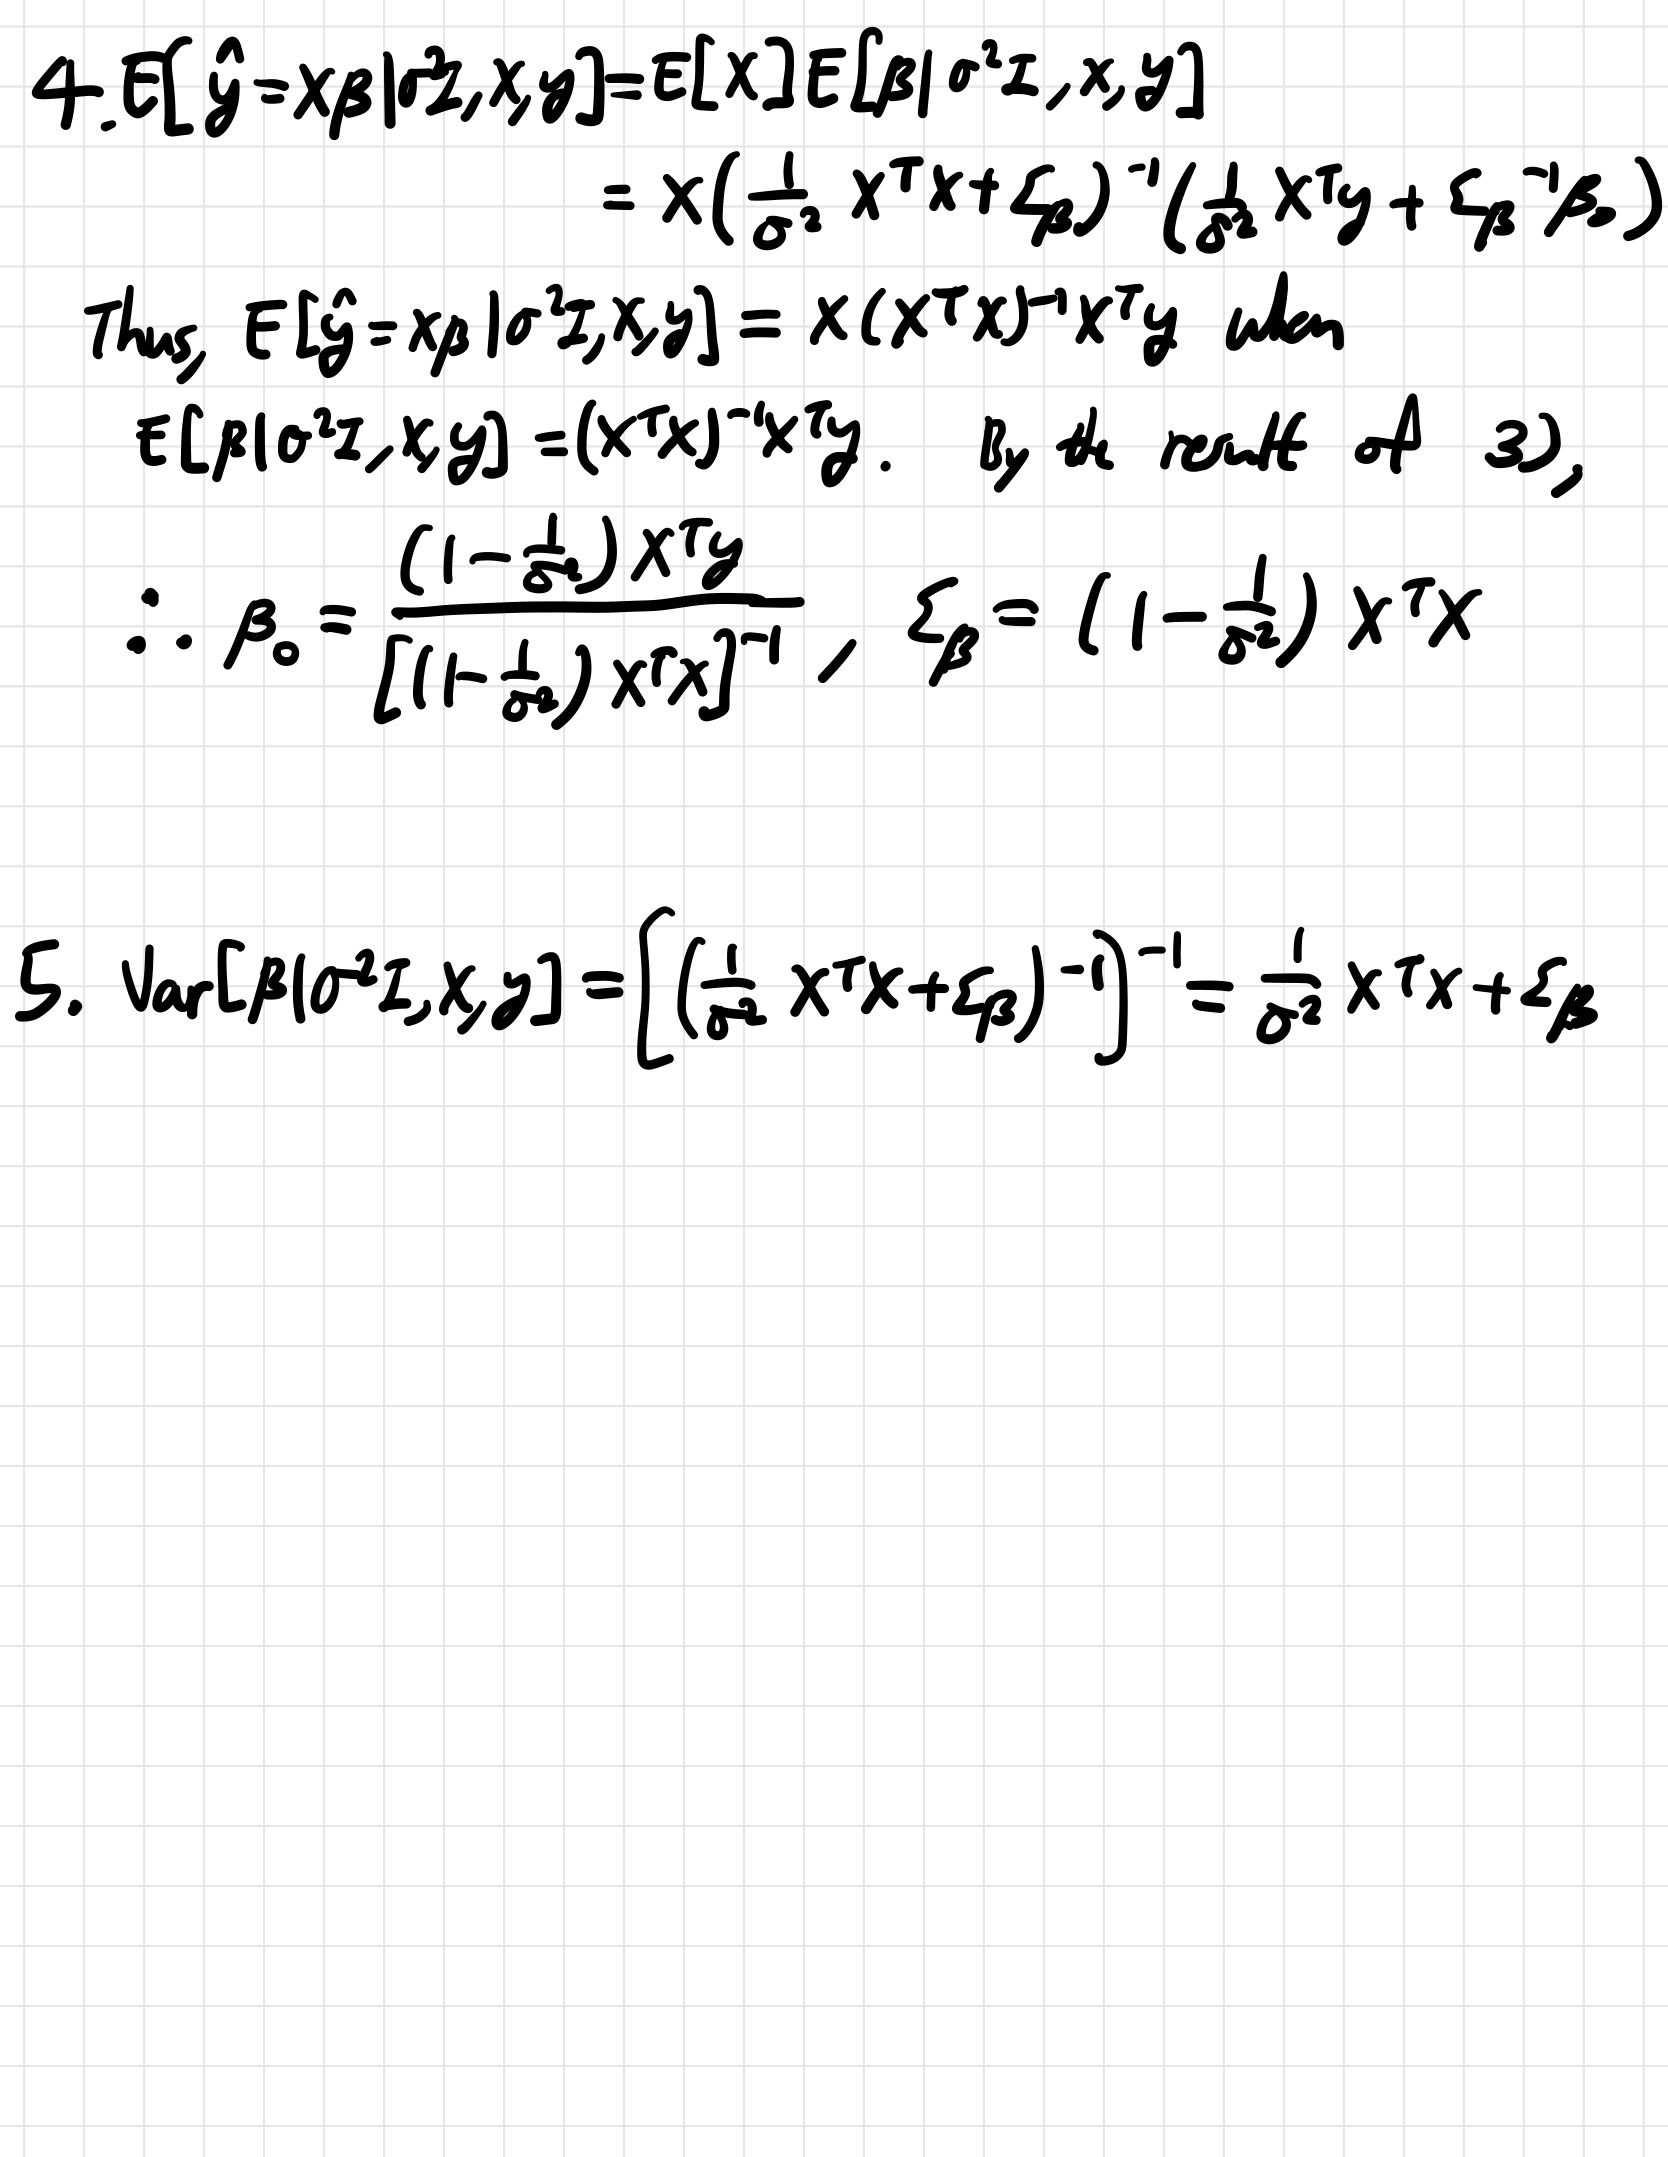

# Part 3

In [84]:
y_multi = data[["Sweetness", "Ripeness", "Acidity"]]
p = 3
n = len(y_multi)
    
with pm.Model() as MNV_LKJ:
    packed_L, corr, stds = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Weibull.dist(alpha=5, beta=2, shape=2), compute_corr=True)
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p), shape=p); 
    y = pm.MvNormal('y', mu=mu, chol=packed_L, shape=(n,1), observed=y_multi) 

    idata_lkj = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 144 seconds.
